# Sales price estimation : Feature anaysis

The dataset describes the sales activity from a marketplace to exchange second-hand products between buyers and sellers. The first columns are describing the characteristics of the products, then 2 columns are measuring the popularity of the products, and the last columns indicate the time online, if the product was sold and the associated sales price. 

Based on this dataset, our objective is to estimate a sales price given the product attributes. This estimated sales price should be both attractive for buyers and sellers, in order to **maximise the number of transactions in the marketplace**, but also to **fullfill the best customer satisfaction**.

## Collect final dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import xgboost as xgb

# Collect dataset
dataset_3 = pd.read_csv(r"data\final_dataset.csv")
dataset_3

,price,pop1,pop2,category_0.0,category_1.0,category_2.0,category_3.0,category_4.0,sub_category_0.0,sub_category_1.0,...,color_19.0,color_20.0,color_21.0,color_22.0,color_23.0,color_24.0,color_25.0,quality_0.0,quality_1.0,quality_2.0
0,-0.005036,-0.024942,-0.108432,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.226308,-0.831731,-0.650328,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.452850,-0.293872,-0.620222,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.663586,-0.293872,-0.334222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.390095,0.243987,0.132411,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,3.103321,0.378452,1.547362,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8503,-0.479192,0.243987,-0.861065,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8504,-0.073525,0.109522,0.222727,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8505,0.995961,1.185241,1.336624,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
# Split features and target price, training set and test set
target = dataset_3['price']
feats = dataset_3.drop(['price'], axis =1)
feats.shape
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=789)

## Feature analysis with Lasso

We train the Lasso model on the training set with the best "alpha" and evaluate the model on the test set. Afterthat, ***we focus on the weight of each feature calculated by the Lasso model.***

rmse train: 0.8168182524416499
rmse test: 0.6177799304727729


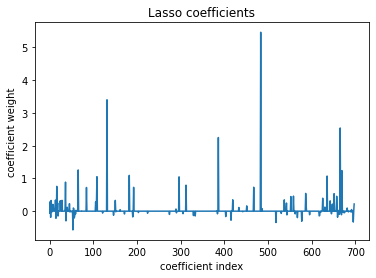

In [11]:
from sklearn.linear_model import Lasso

best_alpha = [0.001]
model_lasso = Lasso(alpha = best_alpha).fit(X_train, y_train)

pred_train = model_lasso.predict(X_train)
print("rmse train:", np.sqrt(mean_squared_error(pred_train, y_train)))

pred_test = model_lasso.predict(X_test)
print("rmse test:", np.sqrt(mean_squared_error(pred_test, y_test)))

lasso_coef = model_lasso.coef_
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.title("Lasso coefficients")
plt.xlabel('coefficient index')
plt.ylabel('coefficient weight')
plt.show()

**Here are the main features determined by the Lasso model (weight > 0.5):**

In [12]:
best_coeff = pd.DataFrame(columns = ['Type','Feature','Weight_Sign','Weight'])
for i in range(len(lasso_coef)):
    if abs(lasso_coef[i])>0.5:
        best_coeff = best_coeff.append({'Feature':X_train.columns[i],'Weight':abs(lasso_coef[i]),'Weight_Sign':lasso_coef[i]/abs(lasso_coef[i]),'Type':X_train.columns[i][:5]}, ignore_index=True)
best_coeff = best_coeff.sort_values(by=['Type','Weight'], ascending=False)
best_coeff

,Type,Feature,Weight_Sign,Weight
3,sub_c,sub_category_58.0,1.0,1.259194
1,sub_c,sub_category_29.0,1.0,0.887001
0,sub_c,sub_category_9.0,1.0,0.758068
2,sub_c,sub_category_46.0,-1.0,0.572794
17,mater,material_63.0,1.0,2.541195
18,mater,material_67.0,1.0,1.237198
15,mater,material_29.0,1.0,1.073029
16,mater,material_46.0,1.0,0.533648
13,brand,brand_849.0,1.0,5.465901
6,brand,brand_145.0,1.0,3.401912


It highlights the key factors with a Linear approach : **Brand / Sub Category / Material**, and which ones specifically are very important.

## Feature analysis with XGBoost

We train the XGBoost model on the training set with the best parameters and evaluate the model on the test set. Afterthat, ***we focus on the feature gain and cover calculated by the XGBoost model.***

In [13]:
best_params = {"learning_rate": 0.1, "max_depth": 3, "reg_alpha": 0.05, "reg_lambda": 2}

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params=best_params,
                    dtrain=dtrain,
                    num_boost_round=999,  # 999,
                    evals=[(dtrain,"Train"),(dtest, "Test")],
                    early_stopping_rounds=150  # 20
    )

[0]	Train-rmse:1.11722	Test-rmse:0.91746
[1]	Train-rmse:1.08584	Test-rmse:0.88270
[2]	Train-rmse:1.05911	Test-rmse:0.85259
[3]	Train-rmse:1.02821	Test-rmse:0.82633
[4]	Train-rmse:1.00097	Test-rmse:0.80505
[5]	Train-rmse:0.97618	Test-rmse:0.78706
[6]	Train-rmse:0.96178	Test-rmse:0.77004
[7]	Train-rmse:0.94094	Test-rmse:0.75946
[8]	Train-rmse:0.92758	Test-rmse:0.74555
[9]	Train-rmse:0.91758	Test-rmse:0.73639
[10]	Train-rmse:0.89966	Test-rmse:0.72688
[11]	Train-rmse:0.89082	Test-rmse:0.71749
[12]	Train-rmse:0.87660	Test-rmse:0.71060
[13]	Train-rmse:0.86919	Test-rmse:0.70358
[14]	Train-rmse:0.85599	Test-rmse:0.69983
[15]	Train-rmse:0.85099	Test-rmse:0.69661
[16]	Train-rmse:0.84545	Test-rmse:0.69179
[17]	Train-rmse:0.84015	Test-rmse:0.68810
[18]	Train-rmse:0.83333	Test-rmse:0.68705
[19]	Train-rmse:0.82924	Test-rmse:0.68412
[20]	Train-rmse:0.82566	Test-rmse:0.68077
[21]	Train-rmse:0.82272	Test-rmse:0.67832
[22]	Train-rmse:0.82020	Test-rmse:0.67791
[23]	Train-rmse:0.81037	Test-rmse:0.67677
[2

[194]	Train-rmse:0.59367	Test-rmse:0.63635
[195]	Train-rmse:0.59335	Test-rmse:0.63574
[196]	Train-rmse:0.59305	Test-rmse:0.63552
[197]	Train-rmse:0.59278	Test-rmse:0.63596
[198]	Train-rmse:0.59252	Test-rmse:0.63580
[199]	Train-rmse:0.59201	Test-rmse:0.63533
[200]	Train-rmse:0.59169	Test-rmse:0.63445
[201]	Train-rmse:0.59140	Test-rmse:0.63427
[202]	Train-rmse:0.59109	Test-rmse:0.63425
[203]	Train-rmse:0.59086	Test-rmse:0.63434
[204]	Train-rmse:0.59058	Test-rmse:0.63455
[205]	Train-rmse:0.59031	Test-rmse:0.63472
[206]	Train-rmse:0.59009	Test-rmse:0.63478
[207]	Train-rmse:0.58963	Test-rmse:0.63511
[208]	Train-rmse:0.58542	Test-rmse:0.63479
[209]	Train-rmse:0.58516	Test-rmse:0.63446
[210]	Train-rmse:0.58493	Test-rmse:0.63436
[211]	Train-rmse:0.58459	Test-rmse:0.63434
[212]	Train-rmse:0.58422	Test-rmse:0.63431
[213]	Train-rmse:0.58390	Test-rmse:0.63405
[214]	Train-rmse:0.58355	Test-rmse:0.63411
[215]	Train-rmse:0.58329	Test-rmse:0.63385
[216]	Train-rmse:0.58299	Test-rmse:0.63372
[217]	Train

[385]	Train-rmse:0.50321	Test-rmse:0.62995
[386]	Train-rmse:0.50299	Test-rmse:0.63081
[387]	Train-rmse:0.50284	Test-rmse:0.63081
[388]	Train-rmse:0.50273	Test-rmse:0.63081
[389]	Train-rmse:0.50261	Test-rmse:0.63092
[390]	Train-rmse:0.50247	Test-rmse:0.63112
[391]	Train-rmse:0.50232	Test-rmse:0.63117
[392]	Train-rmse:0.50210	Test-rmse:0.63124
[393]	Train-rmse:0.50196	Test-rmse:0.63135
[394]	Train-rmse:0.50186	Test-rmse:0.63133
[395]	Train-rmse:0.50172	Test-rmse:0.63116
[396]	Train-rmse:0.50158	Test-rmse:0.63106
[397]	Train-rmse:0.50132	Test-rmse:0.63083
[398]	Train-rmse:0.50121	Test-rmse:0.63079
[399]	Train-rmse:0.50111	Test-rmse:0.63081
[400]	Train-rmse:0.50098	Test-rmse:0.63078
[401]	Train-rmse:0.50088	Test-rmse:0.63078
[402]	Train-rmse:0.50077	Test-rmse:0.63070
[403]	Train-rmse:0.50066	Test-rmse:0.63068
[404]	Train-rmse:0.50055	Test-rmse:0.63064
[405]	Train-rmse:0.50029	Test-rmse:0.63076
[406]	Train-rmse:0.50018	Test-rmse:0.63066
[407]	Train-rmse:0.50009	Test-rmse:0.63069
[408]	Train

In [14]:
pred_train = model.predict(dtrain)
print("rmse train:", np.sqrt(mean_squared_error(pred_train, y_train)))

pred_test = model.predict(dtest)
print("rmse test:", np.sqrt(mean_squared_error(pred_test, y_test)))


rmse train: 0.4875458182207198
rmse test: 0.6335327416086067


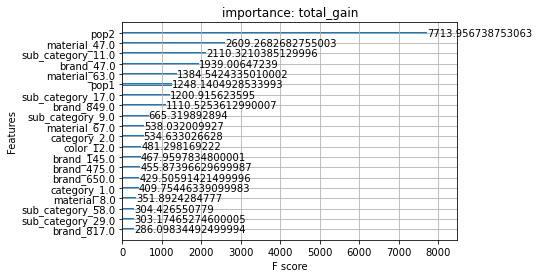

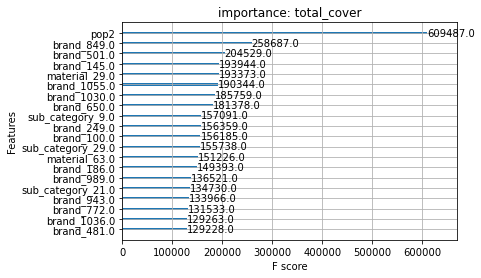

In [15]:
types= ['total_gain', 'total_cover']

for f in types:
    xgb.plot_importance(model ,max_num_features=20, importance_type=f, title='importance: '+f);

## Conclusion about feature analysis

>As a conclusion, we note that ***the main features detected by the Lasso model are also used by the XGBoost model*** to enhance the gain in the different regression trees (i.e. specific **Brand / Sub_Category / Material**).

>But also, we note some new features used by the XGBoost model, in particular ***the "pop2" feature that allow to get an important gain with this modelisation.***